# **HOUSE PRICE PREDICTION**

## 1. Import Library

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Import Data

In [200]:
dfTrain = pd.read_csv('https://raw.githubusercontent.com/hesyandi/Portofolio/master/1_House_Prices/Datasets/house-prices-advanced-regression-techniques/train.csv')
dfTest = pd.read_csv('https://raw.githubusercontent.com/hesyandi/Portofolio/master/1_House_Prices/Datasets/house-prices-advanced-regression-techniques/test.csv')

dfTrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 3. Exploratory Data Analysis

### Data Info

In [201]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [202]:
dfTrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Descriptive Statisic of Target Variable

In [203]:
dfTrain['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Histogram of Target Variable

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

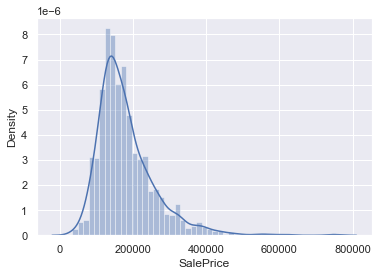

In [204]:
sns.distplot(dfTrain['SalePrice'])

### Skewness and Curtosis of Target Variable

In [205]:
print("Skewness: %f" % dfTrain['SalePrice'].skew())
print("Kurtosis: %f" % dfTrain['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Correlation Map between Variables

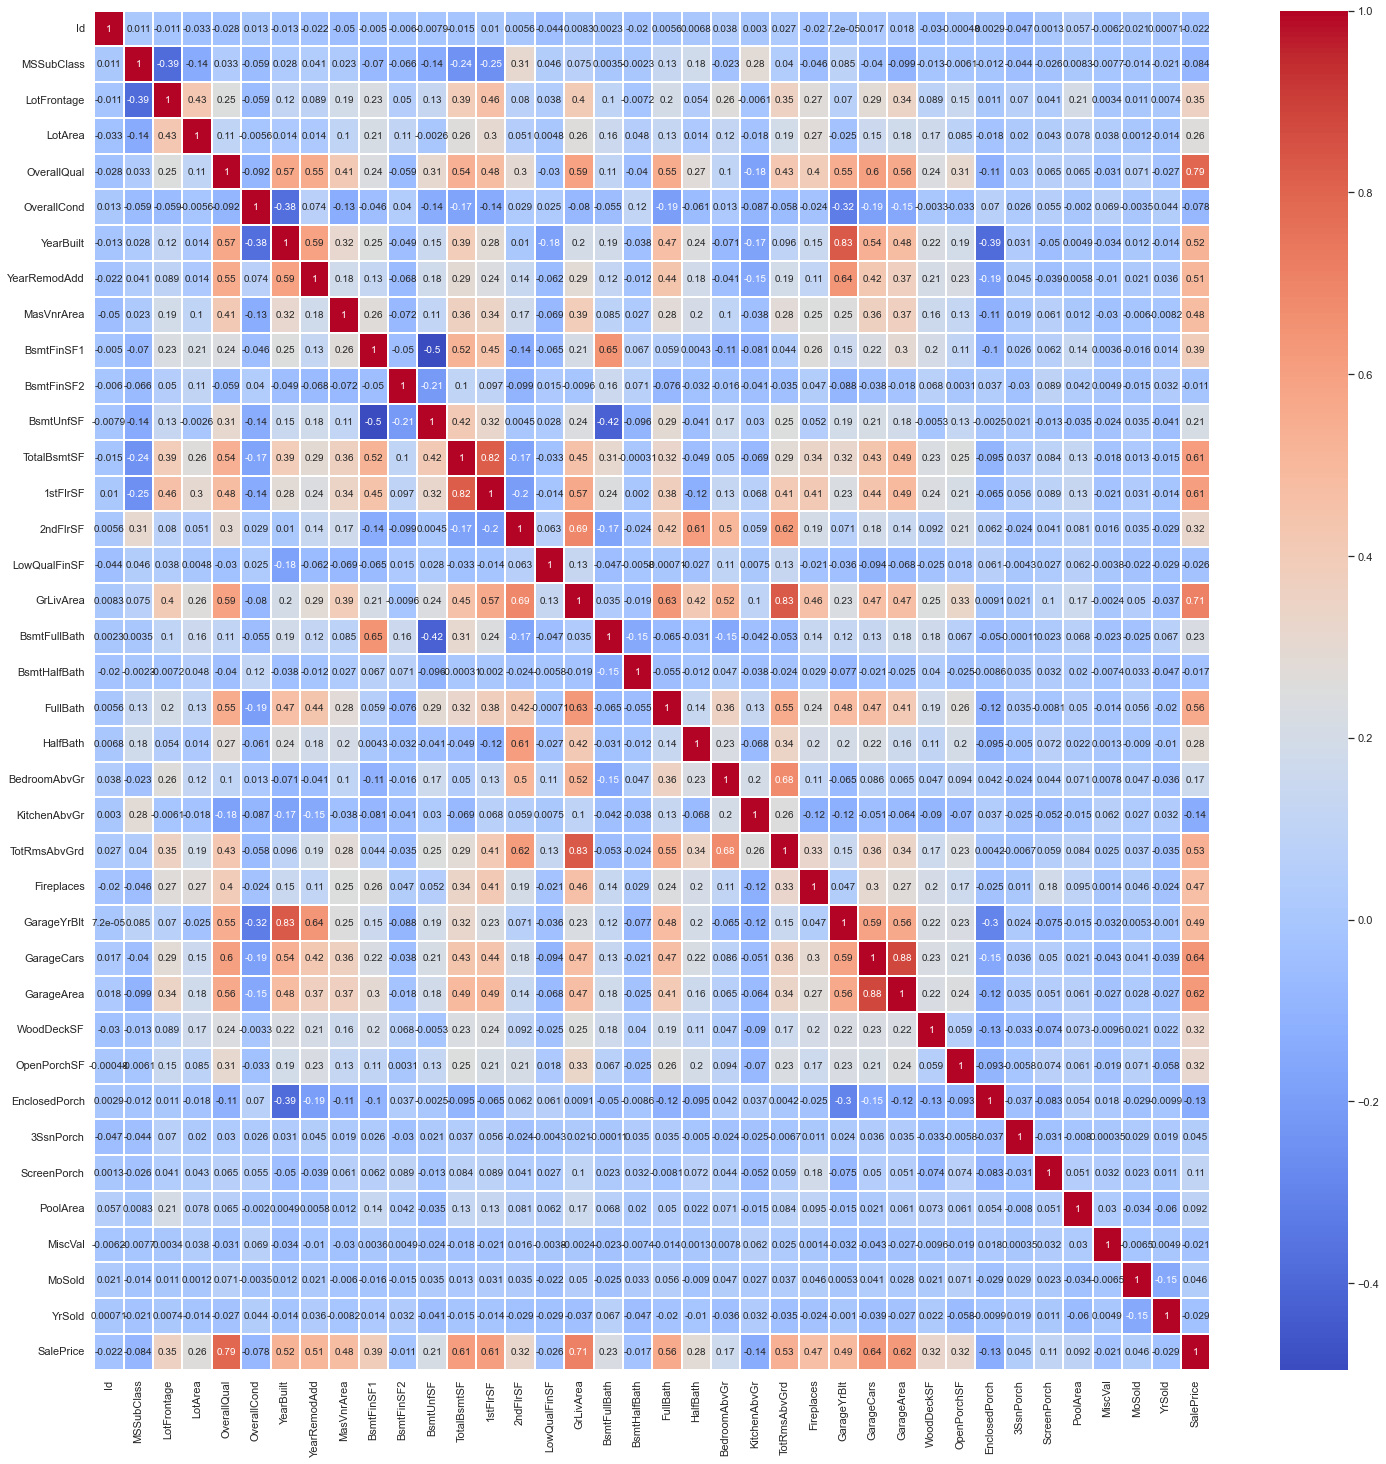

In [206]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(dfTrain.corr(), cmap='coolwarm', annot=True, linewidth=2)

### Correlation Map that Influence Target Variables


In [207]:
corr = dfTrain.corr().sort_values(by='SalePrice', ascending=False)

In [208]:
corr_new = corr.index[abs(corr['SalePrice']) >= 0.5]

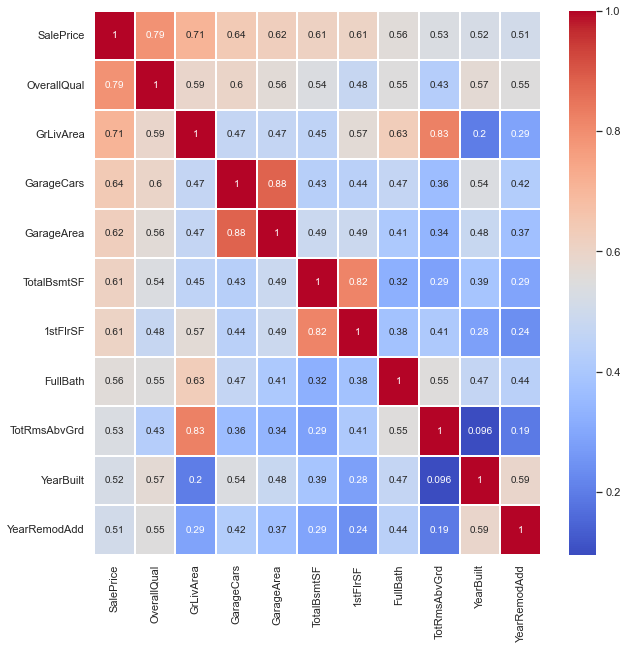

In [209]:
plt.figure(figsize=(10,10))
sns.heatmap(dfTrain[corr_new].corr(), cmap='coolwarm', annot=True, linewidth=2)
plt.show()


### Pair Plot 

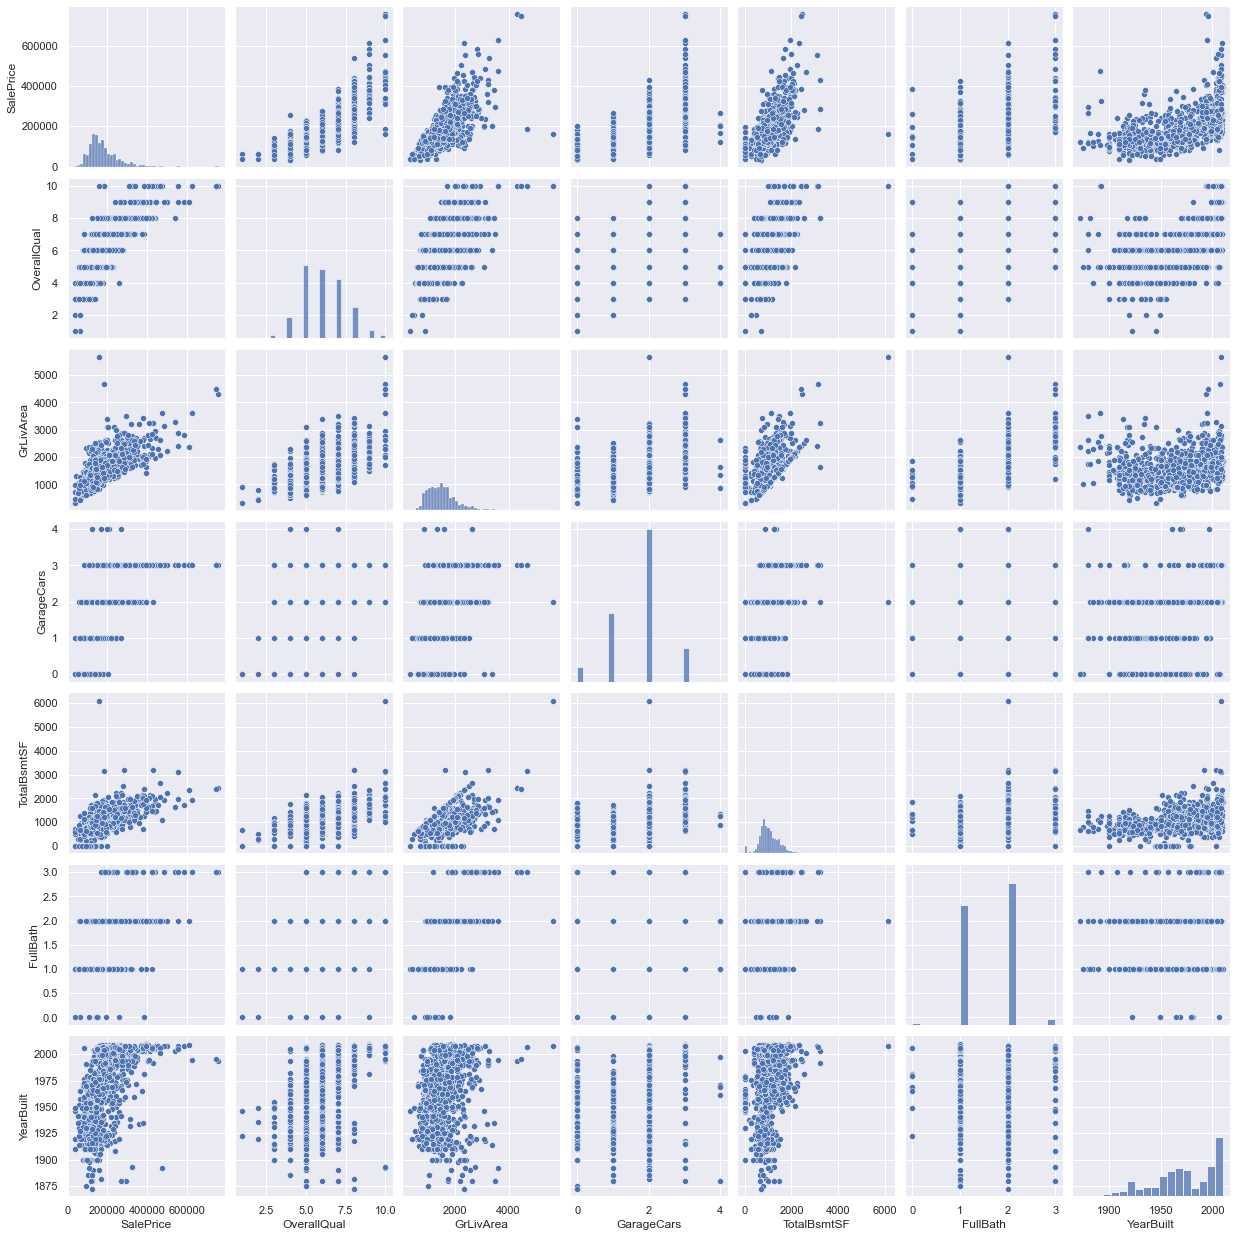

In [210]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(dfTrain[cols], size = 2.5)
plt.show();

## 4. Data Preprocessing


### check the mean and standard deviation of the target variable


 mu = 180921.20 and sigma = 79415.29



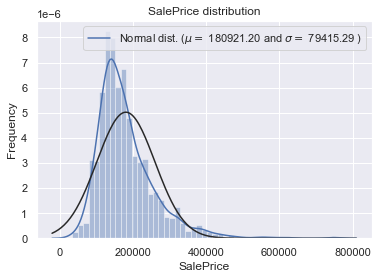

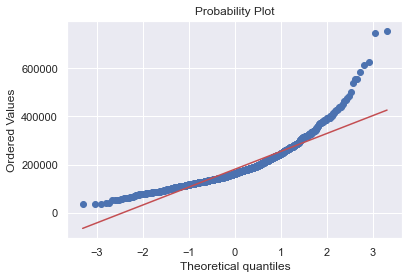

In [211]:
sns.distplot(dfTrain['SalePrice'] , fit=norm)

#get mean (mu) and standard deviation (sigma) 
(mu, sigma) = norm.fit(dfTrain['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#plot histogram variable and normal distribution curve
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#probability plot of the target variable
fig = plt.figure()
res = stats.probplot(dfTrain['SalePrice'], plot=plt)
plt.show()

In [212]:
dfTrain

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Log transformation on target variable


 mu = 12.02 and sigma = 0.40



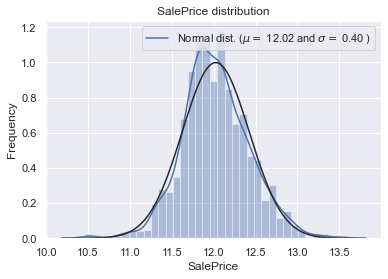

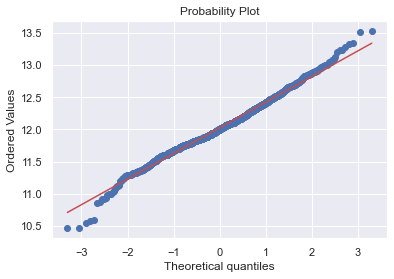

In [213]:
dfTrain['SalePrice'] = np.log1p(dfTrain['SalePrice'])

#Check New Distribution of the Target
sns.distplot(dfTrain['SalePrice'] , fit=norm);

#plot histogram variable and normal distribution curve
(mu, sigma) = norm.fit(dfTrain['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#probability plot of the target variable
fig = plt.figure()
res = stats.probplot(dfTrain['SalePrice'], plot=plt)
plt.show()

In [214]:
dfTrain

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.072547
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,12.254868
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,12.493133
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,11.864469


#### Merge Train and Test Data

In [215]:
ntrain = dfTrain.shape[0]
ntest = dfTest.shape[0]
y_train = dfTrain.SalePrice.values

allData = pd.concat((dfTrain, dfTest)).reset_index(drop=True)
allData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


### Checking Missing Value

#### Missing Value of Train Data

In [216]:
total_train = allData.isnull().sum().sort_values(ascending=False)
percent_train = (allData.isnull().sum()/allData.isnull().count()).sort_values(ascending=False)
missingdata = pd.concat([total_train,percent_train], axis=1, keys=(['Total','Percent'])) 

missingdata.head(20)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageCond,159,0.054471


### Missing Value Treatment

#### Null Value for Categorical Data

In [217]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MSZoning'):
  allData[col] = allData[col].fillna('None')

#### Null Value for Numerical Data

In [218]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
  allData[col] = allData[col].fillna(0)

#### Null Value for Numerical Data fill with Median

In [219]:
for col in ('SalePrice', 'LotFrontage'):
    allData[col] = allData[col].fillna(allData[col].median())

In [220]:
allData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,6,2006,WD,Normal,12.001512
2915,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2006,WD,Abnorml,12.001512
2916,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,9,2006,WD,Abnorml,12.001512
2917,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,Shed,700,7,2006,WD,Normal,12.001512


### Recheck the Missing Value

#### Train Data

In [221]:
total_train = allData.isnull().sum().sort_values(ascending=False)
percent_train = (allData.isnull().sum()/allData.isnull().count()).sort_values(ascending=False)
missingdata = pd.concat([total_train,percent_train], axis=1, keys=(['Total','Percent'])) 

missingdata.head(20)

,Total,Percent
Functional,2,0.000685
Utilities,2,0.000685
Electrical,1,0.000343
KitchenQual,1,0.000343
Exterior2nd,1,0.000343
SaleType,1,0.000343
Exterior1st,1,0.000343
GarageYrBlt,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000


#### Changing Numerical to Categorical Data

In [222]:
#MSSubClass=The building class
allData['MSSubClass'] = allData['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
allData['OverallCond'] = allData['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
allData['YrSold'] = allData['YrSold'].astype(str)
allData['MoSold'] = allData['MoSold'].astype(str)

In [223]:
allData["Functional"] = allData["Functional"].fillna("Typ")

In [224]:
allData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,6,2006,WD,Normal,12.001512
2915,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2006,WD,Abnorml,12.001512
2916,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,9,2006,WD,Abnorml,12.001512
2917,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,Shed,700,7,2006,WD,Normal,12.001512


### Feature Engineering

#### Label Encoder

In [225]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(allData[c].values)) 
    allData[c] = lbl.transform(list(allData[c].values))
# shape        
print('Shape all_data: {}'.format(dfTrain.shape))
print('Shape all_data: {}'.format(dfTest.shape))


Shape all_data: (1460, 81)
Shape all_data: (1459, 80)


In [226]:
allData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,10,RL,65.0,8450,1,1,3,Lvl,AllPub,...,0,3,4,None,0,4,2,WD,Normal,12.247699
1,2,5,RL,80.0,9600,1,1,3,Lvl,AllPub,...,0,3,4,None,0,7,1,WD,Normal,12.109016
2,3,10,RL,68.0,11250,1,1,0,Lvl,AllPub,...,0,3,4,None,0,11,2,WD,Normal,12.317171
3,4,11,RL,60.0,9550,1,1,0,Lvl,AllPub,...,0,3,4,None,0,4,0,WD,Abnorml,11.849405
4,5,10,RL,84.0,14260,1,1,0,Lvl,AllPub,...,0,3,4,None,0,3,2,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,2,RM,21.0,1936,1,1,3,Lvl,AllPub,...,0,3,4,None,0,8,0,WD,Normal,12.001512
2915,2916,2,RM,21.0,1894,1,1,3,Lvl,AllPub,...,0,3,4,None,0,6,0,WD,Abnorml,12.001512
2916,2917,5,RL,160.0,20000,1,1,3,Lvl,AllPub,...,0,3,4,None,0,11,0,WD,Abnorml,12.001512
2917,2918,14,RL,62.0,10441,1,1,3,Lvl,AllPub,...,0,3,2,Shed,700,9,0,WD,Normal,12.001512


#### Check Top 10 Skewness

In [227]:
from scipy.stats import norm, skew

numeric_feats = allData.dtypes[allData.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = allData[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


#### Change variable that has > 0.75 Skewness using Boxcox

In [228]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #dfTrain [feat] += 1
    allData[feat] = boxcox1p(allData[feat], lam)

There are 60 skewed numerical features to Box Cox transform


#### Recheck the Skewness

In [229]:
# Check the skew of all numerical features
skewed_feats = allData[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
PoolArea,15.119426
3SsnPorch,8.924822
LowQualFinSF,8.744143
MiscVal,5.597060
LandSlope,4.532036
BsmtHalfBath,3.788243
KitchenAbvGr,3.698825
ScreenPorch,2.978396
BsmtFinSF2,2.564481
EnclosedPorch,2.025461


In [230]:
allData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.730463,2.885846,RL,5.831328,19.212182,0.730463,0.730463,1.540963,Lvl,AllPub,...,0.0,1.540963,1.820334,None,0.000000,1.820334,1.194318,WD,Normal,3.156009
1,1.194318,2.055642,RL,6.221214,19.712205,0.730463,0.730463,1.540963,Lvl,AllPub,...,0.0,1.540963,1.820334,None,0.000000,2.440268,0.730463,WD,Normal,3.140516
2,1.540963,2.885846,RL,5.914940,20.347241,0.730463,0.730463,0.000000,Lvl,AllPub,...,0.0,1.540963,1.820334,None,0.000000,3.011340,1.194318,WD,Normal,3.163719
3,1.820334,3.011340,RL,5.684507,19.691553,0.730463,0.730463,0.000000,Lvl,AllPub,...,0.0,1.540963,1.820334,None,0.000000,1.820334,0.000000,WD,Abnorml,3.111134
4,2.055642,2.885846,RL,6.314735,21.325160,0.730463,0.730463,0.000000,Lvl,AllPub,...,0.0,1.540963,1.820334,None,0.000000,1.540963,1.194318,WD,Normal,3.176081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,15.394418,1.194318,RM,3.932510,14.081426,0.730463,0.730463,1.540963,Lvl,AllPub,...,0.0,1.540963,1.820334,None,0.000000,2.602594,0.000000,WD,Normal,3.128410
2915,15.395553,1.194318,RM,3.932510,14.013314,0.730463,0.730463,1.540963,Lvl,AllPub,...,0.0,1.540963,1.820334,None,0.000000,2.259674,0.000000,WD,Abnorml,3.128410
2916,15.396687,2.055642,RL,7.620056,22.782058,0.730463,0.730463,1.540963,Lvl,AllPub,...,0.0,1.540963,1.820334,None,0.000000,3.011340,0.000000,WD,Abnorml,3.128410
2917,15.397821,3.340760,RL,5.744420,20.046557,0.730463,0.730463,1.540963,Lvl,AllPub,...,0.0,1.540963,1.194318,Shed,11.147538,2.750250,0.000000,WD,Normal,3.128410


### Dummy Variable

In [231]:
allData = pd.get_dummies(allData, drop_first=True)

print(dfTrain.shape)

(1460, 81)


In [232]:
allData

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.730463,2.885846,5.831328,19.212182,0.730463,0.730463,1.540963,0.000000,2.440268,1.820334,...,0,0,0,0,1,0,0,0,1,0
1,1.194318,2.055642,6.221214,19.712205,0.730463,0.730463,1.540963,0.000000,2.259674,2.440268,...,0,0,0,0,1,0,0,0,1,0
2,1.540963,2.885846,5.914940,20.347241,0.730463,0.730463,0.000000,0.000000,2.440268,1.820334,...,0,0,0,0,1,0,0,0,1,0
3,1.820334,3.011340,5.684507,19.691553,0.730463,0.730463,0.000000,0.000000,2.440268,1.820334,...,0,0,0,0,1,0,0,0,0,0
4,2.055642,2.885846,6.314735,21.325160,0.730463,0.730463,0.000000,0.000000,2.602594,1.820334,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,15.394418,1.194318,3.932510,14.081426,0.730463,0.730463,1.540963,0.000000,1.820334,2.259674,...,0,0,0,0,1,0,0,0,1,0
2915,15.395553,1.194318,3.932510,14.013314,0.730463,0.730463,1.540963,0.000000,1.820334,1.820334,...,0,0,0,0,1,0,0,0,0,0
2916,15.396687,2.055642,7.620056,22.782058,0.730463,0.730463,1.540963,0.000000,2.055642,2.259674,...,0,0,0,0,1,0,0,0,0,0
2917,15.397821,3.340760,5.744420,20.046557,0.730463,0.730463,1.540963,0.000000,2.055642,1.820334,...,0,0,0,0,1,0,0,0,1,0


### Scalling

In [233]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(allData)
allData = scaler.transform(allData)

### Separate the Train and Test Data

In [234]:
X_train = allData[:ntrain]
X_test = allData[ntrain:]

X_train.shape, X_test.shape, y_train.shape

((1460, 204), (1459, 204), (1460,))

## 5. Modelling

### K-Fold function and Evaluation Score

In [235]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 4, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score) 
    
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2) 
    score = [r2_val_score.mean()]
    return score

### Linear Regression

In [236]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

[0.9996023253310036]

In [237]:
LR.fit(X_train, y_train)

LinearRegression()

### Ridge

In [238]:
rdg = linear_model.Ridge()
test_model(rdg)

[0.9079416710505319]

In [239]:
rdg.fit(X_train, y_train)

Ridge()

### Lasso

In [240]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[0.9992776943469016]

### SVR

In [241]:
from sklearn.svm import SVR
svr_reg = SVR(kernel= 'rbf')
test_model(svr_reg)

[0.8552576792559968]

### Decision Tree Regressor

In [242]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=21)
test_model(dt_reg)

[0.9961774280927252]

### Random Forest Regressor

In [243]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=51)
test_model(rf_reg)

[0.9970985590303167]

### Bagging Regressor

In [244]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
br_reg = BaggingRegressor(n_estimators=1000, random_state=51)
test_model(br_reg)

[0.9970617090064506]

### Gradient Boosting Regressor

In [245]:
gbr_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='ls', random_state=51)
test_model(gbr_reg)

[0.9994583265671826]

### XGBoost

In [246]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
test_model(xgb_reg)

[0.998500275046116]

In [255]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

## 6. Prediction

In [262]:
pred = rdg.predict(X_test)

In [271]:
y_pred = np.expm1(pred)
y_pred

array([124261.96898819, 152912.35984545, 176270.88064709, ...,
       168615.7658263 , 124417.1613836 , 212020.29073423])

In [272]:
dfPred = pd.DataFrame(y_pred, columns=['SalePrice'])
dfPred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SalePrice  1459 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [273]:
dfId = pd.DataFrame(dfTest['Id'])
dfId.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      1459 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [274]:
dfId['SalePrice'] = y_pred

submit = dfId

In [275]:
submit.to_csv('Submit.csv', index=False)